# Find Dominant Colors in Images
There are broadly three steps to find the dominant colors in an image:

- Extract RGB values into three lists.
- Perform k-means clustering on scaled RGB values.
- Display the colors of cluster centers.

## 1. Extract RGB values into three lists
To extract RGB values, we use the imread() function of the image class of matplotlib.

Image Dimensions:  (169, 269, 3)


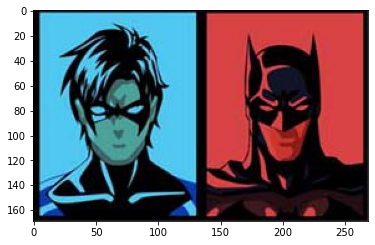

In [1]:
# Import image & pyplot class of matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt

# Read batman image and print dimensions
batman_image = img.imread('batman.jpg')
print('Image Dimensions: ', batman_image.shape)

# Print batman image
plt.imshow(batman_image)

Then, initialize empty lists r, g and b for red, green and blue channels, respectively.

In [2]:
# Initialize r, g and b lists
r = []
g = []
b = []

# Store RGB values of all pixels in lists r, g and b
for row in batman_image:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

Then, Store the RGB values in a DataFrame called pixels.

In [3]:
# Import pandas under alias pd
import pandas as pd

# DataFrame with RGB values : pixels
pixels = pd.DataFrame({'red': r, 'green': g, 'blue': b})

# Print RGB-Values for the first 5 pixels
pixels.head()

,red,green,blue
0,36,28,25
1,39,21,19
2,52,20,21
3,61,27,28
4,37,15,18


Then, Standardize the RGB values using the whiten() function and Store them in columns scaled_red, scaled_green and scaled_blue.

In [4]:
# Import the whiten function
from scipy.cluster.vq import whiten, kmeans

# Use the whiten() function to standardize the data
pixels['scaled_red'] = whiten(pixels['red'])
pixels['scaled_green'] = whiten(pixels['green'])
pixels['scaled_blue'] = whiten(pixels['blue'])

## 2. Perform k-means clustering on scaled RGB values
First, Construct an Elbow Plot with the DataFrame so we can find how many dominant colors are present in our image.

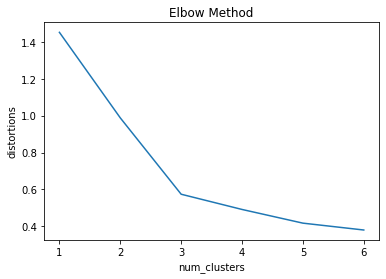

In [5]:
# Initialize a list of distortions : distortions
distortions = []

# Initialize number of clusters list as k = 1 -> 6 : num_clusters
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(pixels[['scaled_red',  'scaled_green', 'scaled_blue']], i)
    distortions.append(distortion)

# Create a DataFrame with two lists, num_clusters and distortions : elbow_plot
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Import seaborn under alias sns
import seaborn as sns

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.title('Elbow Method')
plt.show()

#### Notice, that there are 3 distinct colors present in the image, which is supported by the elbow plot. So, we will use 3 as our value for our hyperparameter k in our cluster.

In [6]:
# use kmeans function with scaled values of red, green & blue, and k = 3 to get our 3 cluster ceters : cluster_centers
cluster_centers, _ = kmeans(pixels[['scaled_red',  'scaled_green', 'scaled_blue']], 3)

## 3. Display the colors of cluster centers
To display the dominant colors, convert the colors of the cluster centers to their raw values and then converted them to the range of 0-1, using the following formula: 
converted_pixel = standardized_pixel * pixel_std / 255

In [7]:
# Get standard deviations of each color : r_std, g_std, b_std
r_std, g_std, b_std = pixels[['red', 'green', 'blue']].std()

# For each cluster center, convert the standardized RGB values to scaled values in the range of 0-1 : colors
colors = []
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append([
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ])

# See our RGB values of our cluster centers (dominant colors)    
colors

[[-0.1335712342511225, 0.2686552933468307, 0.28147578763790304],
 [0.3272528885415564, -0.2484845532736907, -0.11516674166804426],
 [0.060456135986665265, 0.04205570044758413, 0.029374889256628775]]

Then, we can display them using imshow() method on our plt object.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


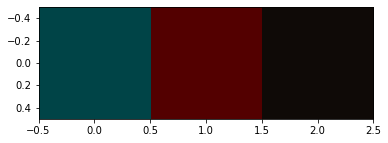

In [8]:
# Display colors of cluster centers
plt.imshow([colors])
plt.show()

# Good Bye. 👋